## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from prettytable import PrettyTable
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

In [2]:
DATASETS_FOLDER = "C:/Users/Killian/Desktop/FYP-Multistage-Throughput-Predictor/Datasets/Final_Outputs/"

In [3]:
import numpy as np

# create the probability table array
prob_tables = np.array([[0.2, 0.2, 0.6], [0.3, 0.1, 0.6]])
print(prob_tables.shape)

# use argmax to get the indices of the maximum values along the second axis
result = np.zeros_like(prob_tables)
result[np.arange(len(prob_tables)), prob_tables.argmax(axis=1)] = 1

print(result)


(2, 3)
[[0. 0. 1.]
 [0. 0. 1.]]


## Defining Analysis Functions

In [4]:
def import_data(model_name="univariate_baseline"):
    true = np.squeeze(np.load(DATASETS_FOLDER+model_name+"_true_y.npy"))
    predicted = np.load(DATASETS_FOLDER+model_name+"_predicted_y.npy")
    return true, predicted

In [58]:
def compute_residuals(true, pred):
    residuals = np.sum(true-pred, axis=1)
    residuals = ((residuals)/true.shape[1])/ 1000
    return residuals

In [41]:
def generate_boxplot(datasets=[],title="DEFAULT", ylab="Residuals (Mbps)",xlab=[], colours=[],
                      output_folder="C:/Users/Killian/Desktop/FYP-Multistage-Throughput-Predictor/Datasets/Images/", ylim=()):
    fig, ax = plt.subplots()
    ax.set_title(title)
    ax.set_ylabel(ylab)
    box = ax.boxplot(datasets, whis=(5,95), patch_artist=True, notch=True, flierprops={'marker': 'o', 'markersize': 5, 'markerfacecolor': 'fuchsia'})
    ax.set_xticklabels(xlab)
    if colours:
        for bplot, colour in zip(box["boxes"], colours):
            bplot.set_color(colour)
    if ylim:
        ax.set_ylim(ylim)
    ax.yaxis.grid(True)
    plt.xticks(rotation=-45)
    plt.savefig(output_folder+title+".png", dpi=320)

In [53]:
def get_variance(data):
    return np.var(data)

In [54]:
def get_std(data):
    return np.std(data)

In [55]:
def get_ts_residuals(true, pred):
        residuals = true-pred
        residuals = residuals / 1000
        return residuals

In [56]:
import seaborn as sns
def time_step_boxpots(residuals=[], model_names=[], title="", xlim=()):
    df = pd.DataFrame()
    for model, residuals in zip(model_names, residuals):
        for i in range(residuals.shape[1]):
            temp_df = pd.DataFrame()
            temp_df["Residuals (Mb)"] = residuals[:,i]
            temp_df["Time Step"] = i+1
            temp_df["Model"] = model
            df = pd.concat([df, temp_df])
    sns.set_theme(style="whitegrid")
    box = sns.boxplot(x="Residuals (Mb)", y="Time Step",
                hue="Model",
                data=df, orient="h", whis=(5,95), saturation=1, flierprops={'marker': 'o', 'markersize': 5, 'markerfacecolor': 'pink'})
    if xlim:
        box.set_xlim(xlim)
    box.set_title(title)
    box.set_ylabel("Future Time Step (seconds)")
    

# Individual Models

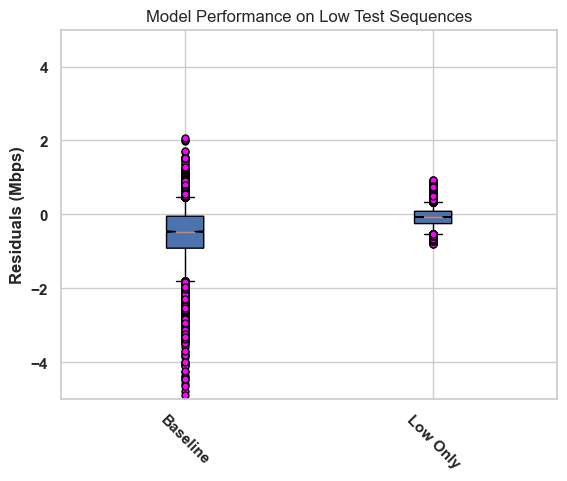

In [59]:
true, pred = import_data("solo_low_all_network")
low = compute_residuals(true, pred)
low_ts = get_ts_residuals(true, pred)
true, pred = import_data("standard_4_all_network_baseline_low")
base_low = compute_residuals(true, pred)
base_low_ts = get_ts_residuals(true, pred)
generate_boxplot(datasets=[base_low, low], xlab=["Baseline", "Low Only"], title="Model Performance on Low Test Sequences", ylim=(-5,5))

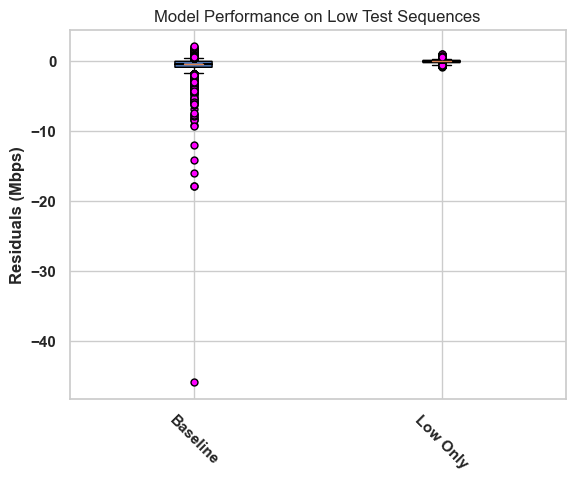

In [94]:
generate_boxplot(datasets=[base_low, low], xlab=["Baseline", "Low Only"], title="Model Performance on Low Test Sequences")

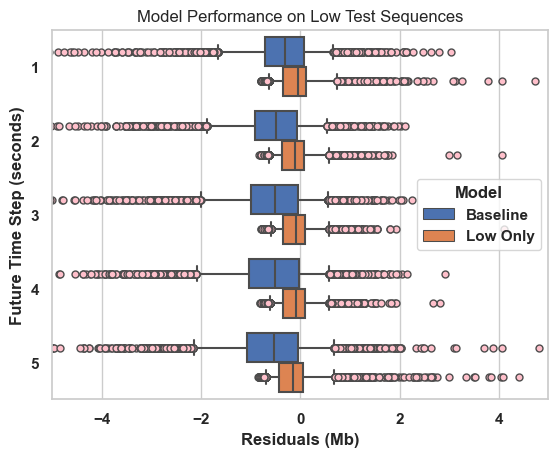

In [61]:
time_step_boxpots([base_low_ts, low_ts], model_names=["Baseline", "Low Only"], xlim=(-5,5), title="Model Performance on Low Test Sequences")

In [63]:
base_std = get_std(base_low)
low_std = get_std(low)
table_low = PrettyTable(["Model","Mean (Mb)", "Standard Dev (Mb)"])
table_low.add_row(["Baseline", np.mean(base_low_ts), np.std(base_low_ts)])
table_low.add_row(["Low Only Model", np.mean(low_ts), np.std(low_ts)])
print("Residuals of Low Sequences Test Set")
print(table_low)

Residuals of Low Sequences Test Set
+----------------+----------------------+--------------------+
|     Model      |      Mean (Mb)       | Standard Dev (Mb)  |
+----------------+----------------------+--------------------+
|    Baseline    | -0.5860041683526068  | 1.2697900648101184 |
| Low Only Model | -0.08374551402536326 | 0.4151138109984922 |
+----------------+----------------------+--------------------+


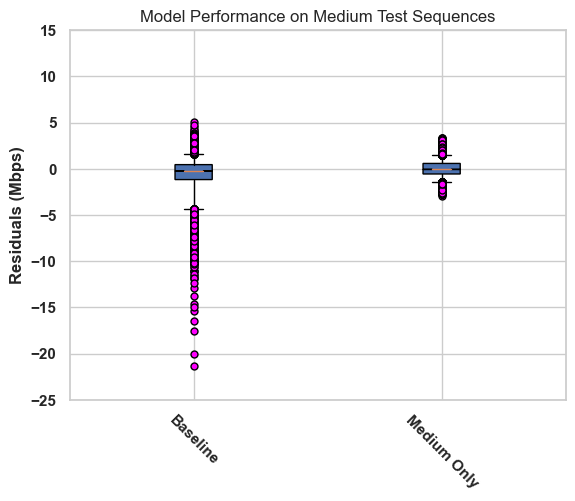

In [74]:
true, pred = import_data("solo_medium_all_network")
medium = compute_residuals(true, pred)
medium_ts = get_ts_residuals(true, pred)
true, pred = import_data("standard_4_all_network_baseline_medium")
base_medium = compute_residuals(true, pred)
base_medium_ts = get_ts_residuals(true, pred)
generate_boxplot(datasets=[base_medium, medium], xlab=["Baseline", "Medium Only"], title="Model Performance on Medium Test Sequences", ylim=(-25,15))

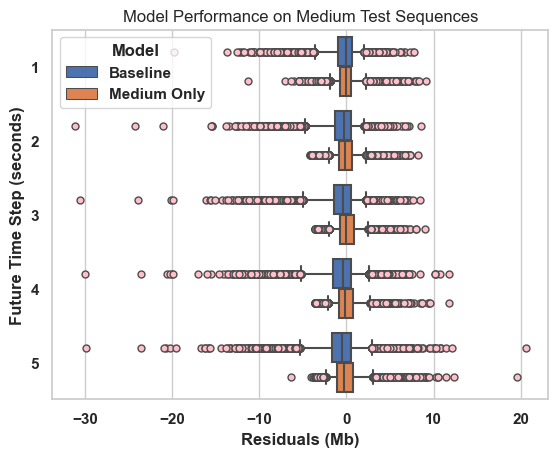

In [75]:
time_step_boxpots([base_medium_ts, medium_ts], model_names=["Baseline", "Medium Only"], title="Model Performance on Medium Test Sequences")


In [73]:
base_std = get_std(base_medium_ts)
medium_std = get_std(medium_ts)
table_medium = PrettyTable(["Model","Mean (Mb)", "Standard Dev (Mb)"])
table_medium.add_row(["Baseline",np.mean(base_medium_ts), base_std])
table_medium.add_row(["Medium Only Model",np.mean(medium_ts), medium_std])
print("Residuals of Medium Sequences Test Set")
print(table_medium)

Residuals of Medium Sequences Test Set
+-------------------+----------------------+--------------------+
|       Model       |      Mean (Mb)       | Standard Dev (Mb)  |
+-------------------+----------------------+--------------------+
|      Baseline     | -0.6186391210249489  | 2.3154437980716804 |
| Medium Only Model | 0.007299761038765521 | 1.4568877461239058 |
+-------------------+----------------------+--------------------+


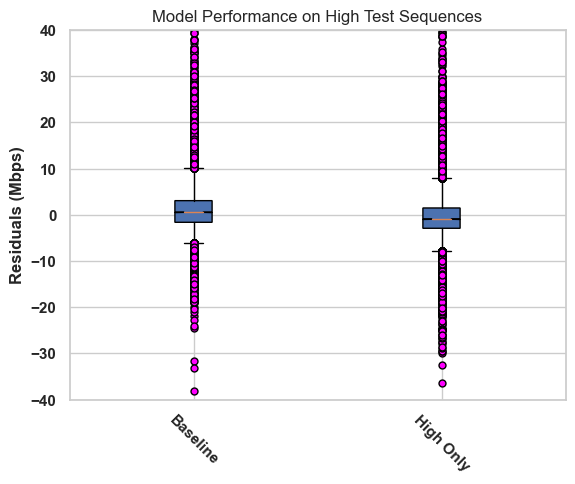

In [78]:
true, pred = import_data("solo_high_all_network")
high = compute_residuals(true, pred)
high_ts = get_ts_residuals(true, pred)
true, pred = import_data("standard_4_all_network_baseline_high")
base_high = compute_residuals(true, pred)
base_high_ts = get_ts_residuals(true, pred)
generate_boxplot(datasets=[base_high, high], xlab=["Baseline", "High Only"], title="Model Performance on High Test Sequences", ylim=(-40, 40))

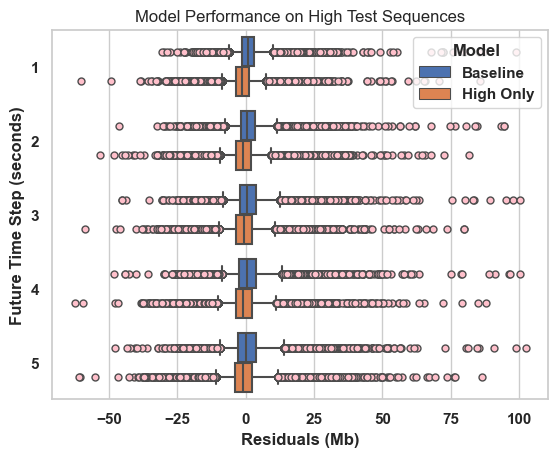

In [79]:
time_step_boxpots([base_high_ts, high_ts], model_names=["Baseline", "High Only"], title="Model Performance on High Test Sequences")


In [80]:
base_std = get_std(base_high_ts)
high_std = get_std(high_ts)
table_high = PrettyTable(["Model","Mean (Mb)", "Standard Dev (Mb)"])
table_high.add_row(["Baseline",np.mean(base_high_ts), base_std])
table_high.add_row(["High Only Model",np.mean(high_ts), high_std])
print("Residuals of High Sequences Test Set")
print(table_high)

Residuals of High Sequences Test Set
+-----------------+---------------------+-------------------+
|      Model      |      Mean (Mb)      | Standard Dev (Mb) |
+-----------------+---------------------+-------------------+
|     Baseline    |  1.1603552227945595 | 7.049726575529738 |
| High Only Model | -0.5036992952485793 |  6.93367129172688 |
+-----------------+---------------------+-------------------+


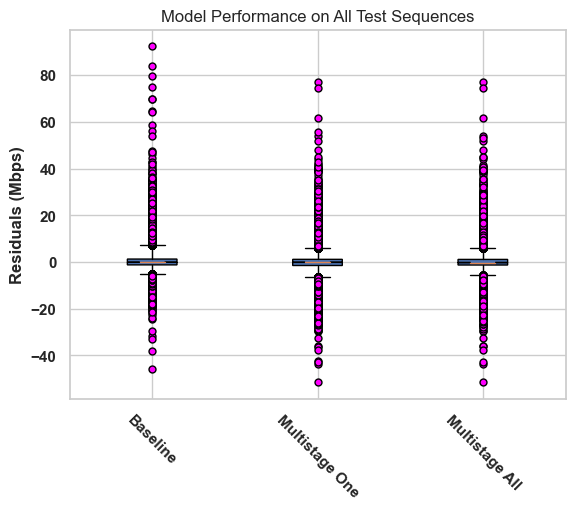

In [82]:
true, pred = import_data("standardized_multiOne")
multi_one = compute_residuals(true, pred)
multi_one_ts = get_ts_residuals(true, pred)

true, pred = import_data("standardized_multiAll")
multi_all = compute_residuals(true, pred)
multi_all_ts = get_ts_residuals(true, pred)

true, pred = import_data("standard_4_all_network_baseline")
base = compute_residuals(true, pred)
base_ts = get_ts_residuals(true, pred)
generate_boxplot(datasets=[base, multi_one, multi_all], xlab=["Baseline", "Multistage One", "Multistage All"], title="Model Performance on All Test Sequences")
# generate_boxplot(datasets=[base, multi_one], xlab=["Baseline", "Multistage One"], title="Model Performance on all Test Sequences")

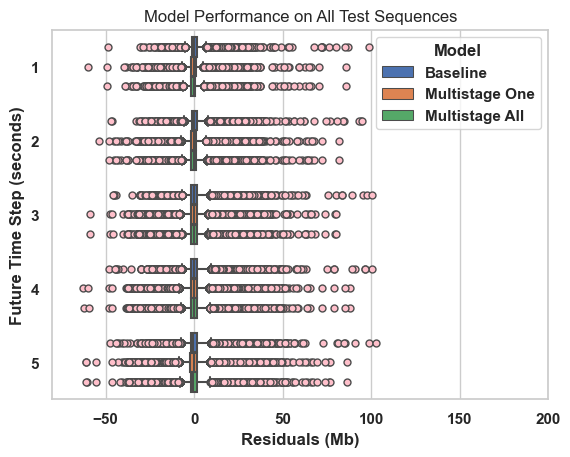

In [93]:
time_step_boxpots([base_ts, multi_one_ts, multi_all_ts], model_names=["Baseline", "Multistage One", "Multistage All"], title="Model Performance on All Test Sequences", xlim=(-80, 200))


In [68]:
base_std = get_std(base)
multi_one_std = get_std(multi_one)
multi_all_std = get_std(multi_all)
table = PrettyTable(["Model","Mean (Mb)", "Standard Dev (Mb)"])
table.add_row(["Baseline",np.mean(base), base_std])
table.add_row(["Multistage One",np.mean(multi_one), multi_one_std])
table.add_row(["Multistage All",np.mean(multi_all), multi_all_std])
print("Residuals of All Sequences Test Set")
print(table)

Residuals of All Sequences Test Set
+----------------+---------------------+--------------------+
|     Model      |      Mean (Mb)      | Standard Dev (Mb)  |
+----------------+---------------------+--------------------+
|    Baseline    |  1.7475118146081794 | 22.326735321061207 |
| Multistage One | -0.5489678355247941 | 22.36855449980445  |
| Multistage All |  0.166101626871677  | 21.740109912761376 |
+----------------+---------------------+--------------------+


In [32]:
print("Residuals of Low Sequences Test Set")
print(table_low)
print("==============================================================\n")
print("Residuals of Medium Sequences Test Set")
print(table_medium)
print("==============================================================\n")
print("Residuals of High Sequences Test Set")
print(table_high)
print("==============================================================")

Residuals of Low Sequences Test Set
+----------------+----------------------+--------------------+
|     Model      |      Mean (Mb)       | Standard Dev (Mb)  |
+----------------+----------------------+--------------------+
|    Baseline    | -2.9300208417630347  | 6.099708539326167  |
| Low Only Model | -0.41872757012681633 | 1.2964441741282975 |
+----------------+----------------------+--------------------+

Residuals of Medium Sequences Test Set
+-------------------+----------------------+-------------------+
|       Model       |      Mean (Mb)       | Standard Dev (Mb) |
+-------------------+----------------------+-------------------+
|      Baseline     | -3.0931956051247442  | 9.857150766565072 |
| Medium Only Model | 0.036498805193827595 | 4.408891961623033 |
+-------------------+----------------------+-------------------+

Residuals of High Sequences Test Set
+-----------------+--------------------+--------------------+
|      Model      |     Mean (Mb)      | Standard Dev (M

[2 2 2 ... 2 2 2]
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[2 2 2 ... 1 1 2]


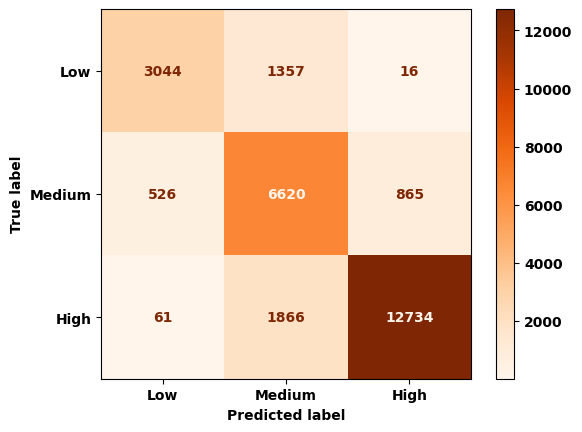

In [33]:
true, pred = import_data("solo_all_network_classifier")
print(true)
print(pred)
pred = np.argmax(pred, axis=-1)
print(pred)
conf_matrix = confusion_matrix(true, pred)
display_conf = ConfusionMatrixDisplay(conf_matrix, display_labels=["Low", "Medium", "High"])
display_conf.plot(cmap="Oranges")
plt.show()

In [9]:
true = np.load(DATASETS_FOLDER+"univariate_multiOne_classifier_true_y.npy")
print(true)
pred = np.squeeze(np.load(DATASETS_FOLDER+"univariate_multiOne_classifier_predicted_y.npy"))
print(pred)
true = np.load(DATASETS_FOLDER+"univariate_multiAll_classifier_true_y.npy")
print(true)
pred = np.squeeze(np.load(DATASETS_FOLDER+"univariate_multiAll_classifier_predicted_y.npy"))
print(pred)

[[2]
 [2]
 [2]
 ...
 [2]
 [2]
 [2]]
[[6.4462512e-03 3.5080772e-02 9.5847297e-01]
 [4.5919586e-03 3.8998496e-02 9.5640957e-01]
 [2.3111807e-04 1.1133933e-02 9.8863494e-01]
 ...
 [3.8620234e-02 8.3282530e-01 1.2855443e-01]
 [6.7691556e-03 8.1110352e-01 1.8212728e-01]
 [4.9013644e-03 5.6901115e-01 4.2608750e-01]]
[[0 0 1]
 [0 0 1]
 [0 0 1]
 ...
 [0 0 1]
 [0 0 1]
 [0 0 1]]
[[8.1303262e-04 3.2080017e-02 9.6710694e-01]
 [1.5232499e-03 3.5770137e-02 9.6270669e-01]
 [2.3556269e-05 4.7335876e-03 9.9524277e-01]
 ...
 [2.5211621e-02 9.1530746e-01 5.9480920e-02]
 [1.0241528e-02 8.2976514e-01 1.5999328e-01]
 [3.8855996e-03 5.4692084e-01 4.4919354e-01]]


In [10]:
def carry_out_analysis(prefix="univariate", title_prefix="Univariate"):
    for test_set in ["", "low", "medium", "high"]:
        all_residuals = []
        xlabels = []
        table = PrettyTable(["Model", "Standard Dev"])

        # Baseline Model
        if not test_set:
            true, pred = import_data(prefix+"_{}".format("baseline"))
        else:
            true, pred = import_data(prefix+"_{}_{}".format("baseline", test_set))
        residuals = compute_residuals(true, pred)
        all_residuals.append(residuals)
        xlabels.append("Baseline")
        std = get_std(residuals)
        table.add_row(["Baseline", std])

        # Multi Stage One Regression Model
        if not test_set:
            true, pred = import_data(prefix+"_{}".format("multiOne"))
            residuals = compute_residuals(true, pred)
            all_residuals.append(residuals)
            xlabels.append("Multistage One")
            std = get_std(residuals)
            table.add_row(["Multistage One", std])
        else:
            true, pred = import_data(prefix+"_{}_{}".format("multiOne", test_set))
            residuals = compute_residuals(true, pred)
            all_residuals.append(residuals)
            xlabels.append("{} Only Model".format(test_set.capitalize()))
            std = get_std(residuals)
            table.add_row(["{} Only Model".format(test_set.capitalize()), std])
        
        # Multi Stage All Regression Model
        if not test_set:
            true, pred = import_data(prefix+"_{}".format("multiAll"))
            residuals = compute_residuals(true, pred)
            all_residuals.append(residuals)
            xlabels.append("Multistage All")
            std = get_std(residuals)
            table.add_row(["Multistage All", std])
        box_title = title_prefix + " {}".format(test_set.capitalize())
        if not test_set:
            box_title = title_prefix

        generate_boxplot(all_residuals, title=box_title, xlab=xlabels)
        print(box_title)
        print(table)
        print("\n\n")

    # Multi Stage One Classifier
    true, pred = import_data(prefix+"_{}_{}".format("multiOne", "classifier"))
    print(true)
    print(pred)
    pred = np.argmax(pred, axis=-1)
    print(pred)
    conf_matrix = confusion_matrix(true, pred)
    display_conf = ConfusionMatrixDisplay(conf_matrix, display_labels=["Low", "Medium", "High"])
    display_conf.plot(cmap="Blues")
    plt.show()


## Exploring Models

Standardised with all Physical Layer Features
+----------------+--------------------+
|     Model      |    Standard Dev    |
+----------------+--------------------+
|    Baseline    | 22326.735321061205 |
| Multistage One | 22593.25018234293  |
| Multistage All | 21394.215952708848 |
+----------------+--------------------+



Standardised with all Physical Layer Features Low
+----------------+-------------------+
|     Model      |    Standard Dev   |
+----------------+-------------------+
|    Baseline    | 6099.708539326168 |
| Low Only Model | 6286.780127513134 |
+----------------+-------------------+



Standardised with all Physical Layer Features Medium
+-------------------+-------------------+
|       Model       |    Standard Dev   |
+-------------------+-------------------+
|      Baseline     |  9857.15076656507 |
| Medium Only Model | 8803.907321951445 |
+-------------------+-------------------+



Standardised with all Physical Layer Features High
+-----------------+------

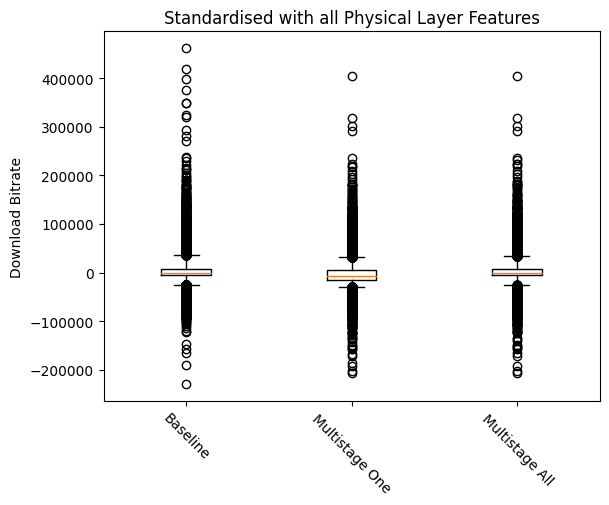

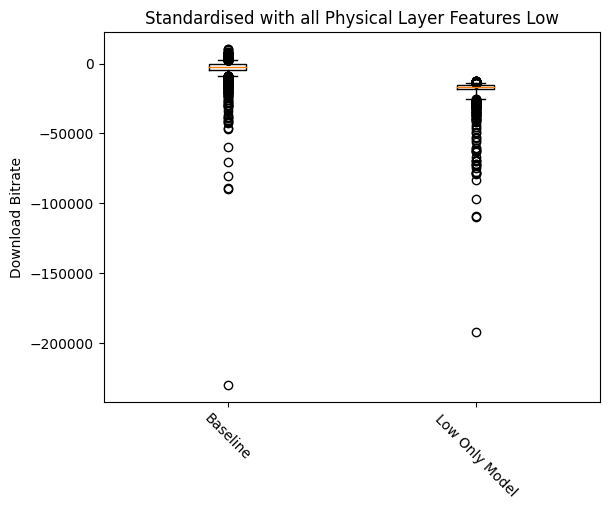

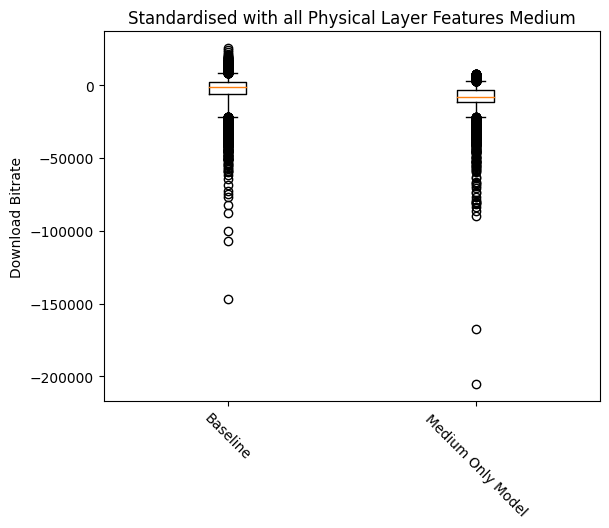

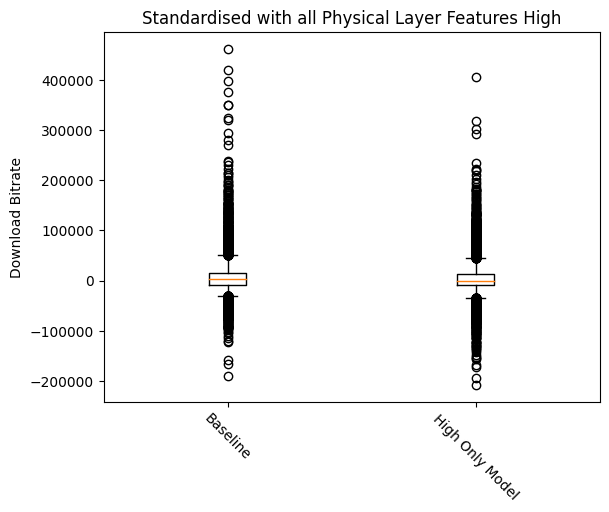

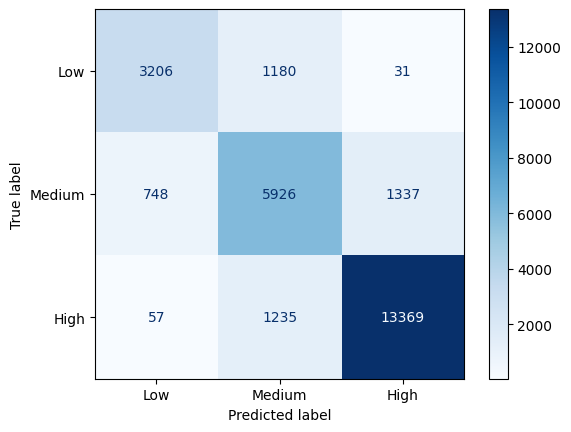

In [11]:
carry_out_analysis(prefix="standard_4_all_network", title_prefix="Standardised with all Physical Layer Features")

All Network Features
+----------------+--------------------+
|     Model      |    Standard Dev    |
+----------------+--------------------+
|    Baseline    | 22387.637008288602 |
| Multistage One | 21570.46851035124  |
| Multistage All | 21584.080273394848 |
+----------------+--------------------+



All Network Features Low
+----------------+-------------------+
|     Model      |    Standard Dev   |
+----------------+-------------------+
|    Baseline    | 5539.026575360111 |
| Low Only Model | 1664.379185496338 |
+----------------+-------------------+



All Network Features Medium
+-------------------+-------------------+
|       Model       |    Standard Dev   |
+-------------------+-------------------+
|      Baseline     | 7957.195529994469 |
| Medium Only Model | 5825.968097862568 |
+-------------------+-------------------+



All Network Features High
+-----------------+--------------------+
|      Model      |    Standard Dev    |
+-----------------+--------------------+
| 

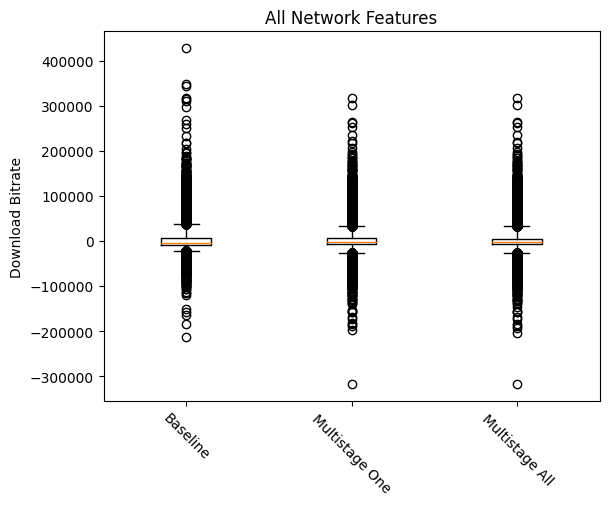

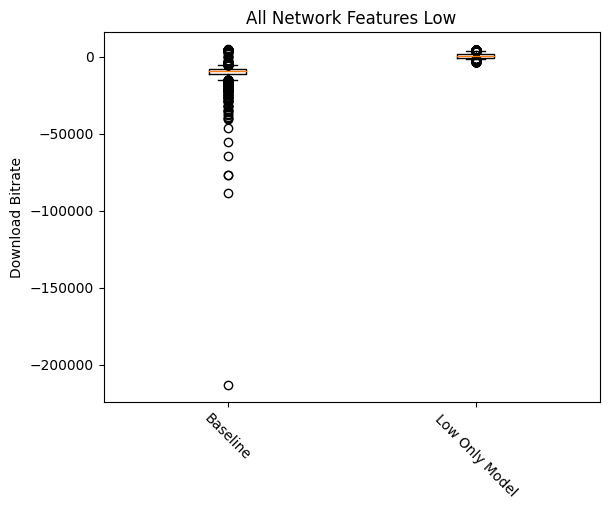

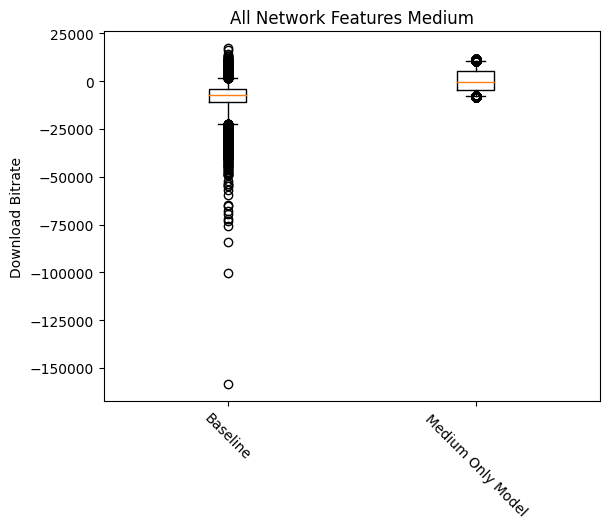

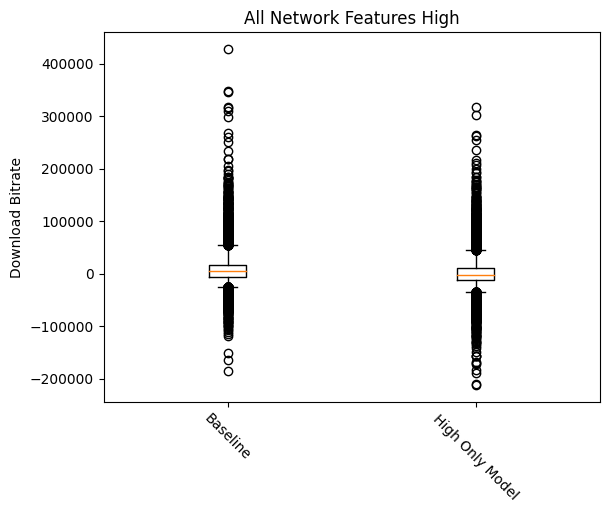

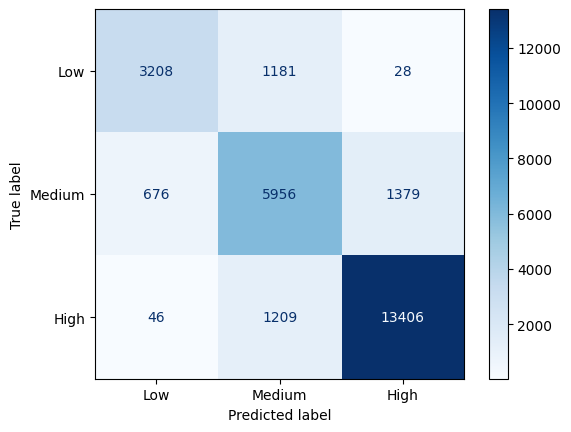

In [12]:
carry_out_analysis(prefix="all_network", title_prefix="All Network Features")

Univariate
+----------------+--------------------+
|     Model      |    Standard Dev    |
+----------------+--------------------+
|    Baseline    | 21482.53553488244  |
| Multistage One | 22238.931354062708 |
| Multistage All | 22259.96172329342  |
+----------------+--------------------+



Univariate Low
+----------------+--------------------+
|     Model      |    Standard Dev    |
+----------------+--------------------+
|    Baseline    | 6365.306593508282  |
| Low Only Model | 1608.0984004484721 |
+----------------+--------------------+



Univariate Medium
+-------------------+-------------------+
|       Model       |    Standard Dev   |
+-------------------+-------------------+
|      Baseline     | 10149.86144151568 |
| Medium Only Model | 5825.968098433801 |
+-------------------+-------------------+



Univariate High
+-----------------+--------------------+
|      Model      |    Standard Dev    |
+-----------------+--------------------+
|     Baseline    | 27911.8122866969

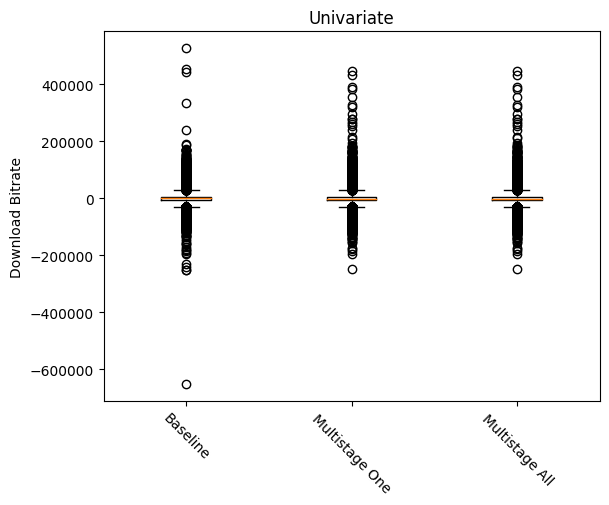

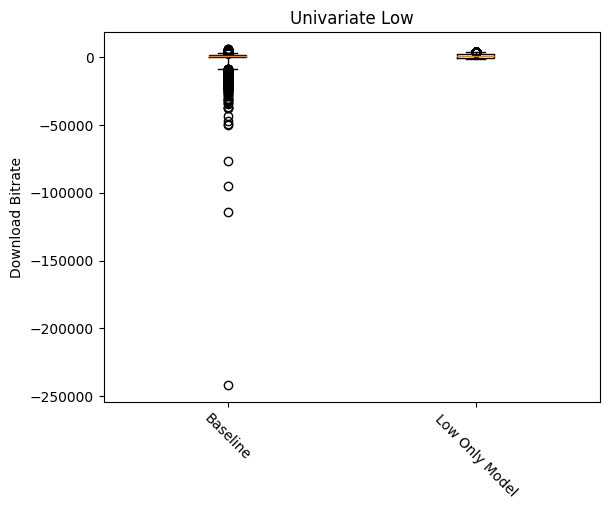

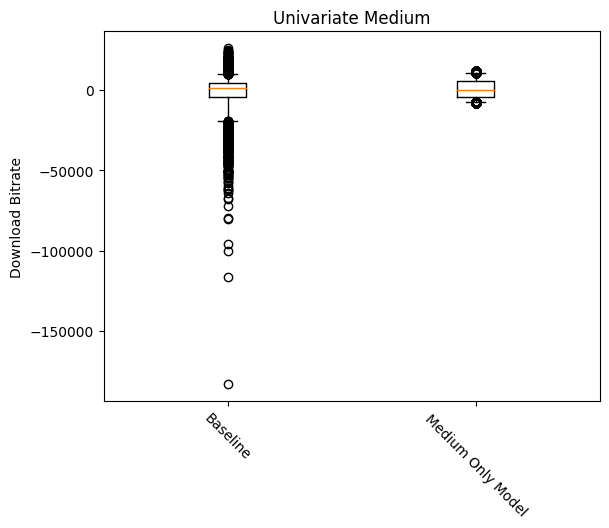

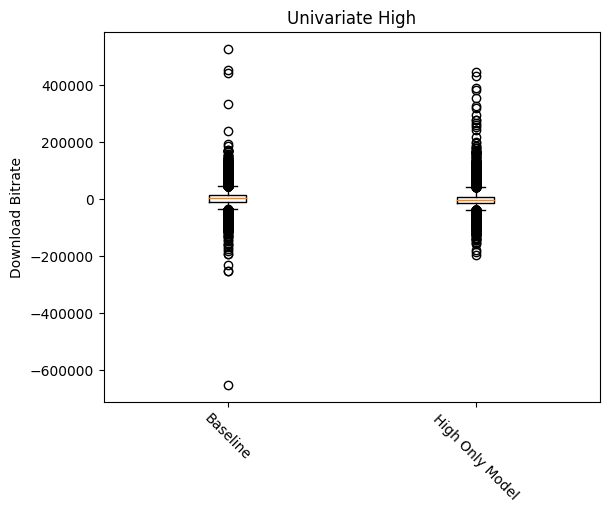

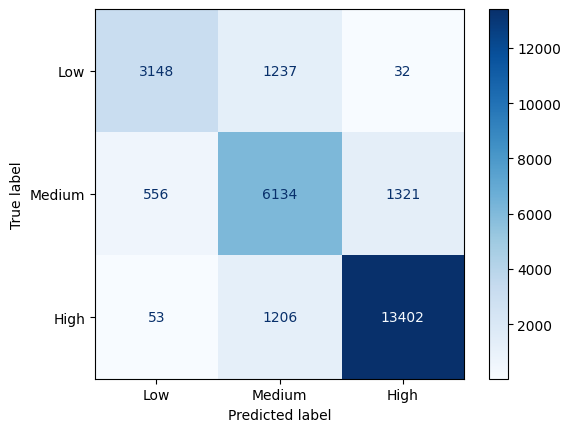

In [13]:
carry_out_analysis("univariate", "Univariate")

All Network Features - KNNImputer
+----------------+--------------------+
|     Model      |    Standard Dev    |
+----------------+--------------------+
|    Baseline    | 22580.64105141987  |
| Multistage One | 21837.718469127656 |
| Multistage All | 21927.441969185806 |
+----------------+--------------------+



All Network Features - KNNImputer Low
+----------------+--------------------+
|     Model      |    Standard Dev    |
+----------------+--------------------+
|    Baseline    | 5938.278621079734  |
| Low Only Model | 1312.8719930571503 |
+----------------+--------------------+



All Network Features - KNNImputer Medium
+-------------------+-------------------+
|       Model       |    Standard Dev   |
+-------------------+-------------------+
|      Baseline     | 9045.483318881827 |
| Medium Only Model | 5825.968097862568 |
+-------------------+-------------------+



All Network Features - KNNImputer High
+-----------------+-------------------+
|      Model      |    Stan

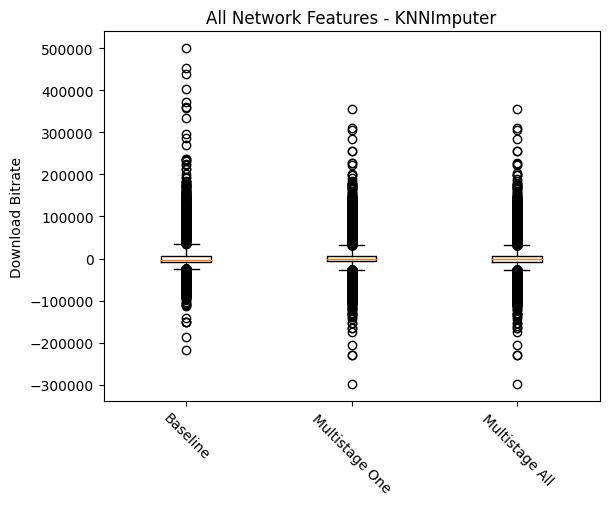

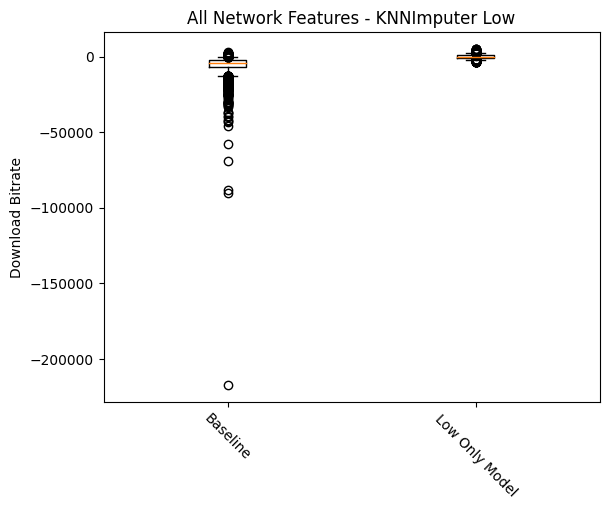

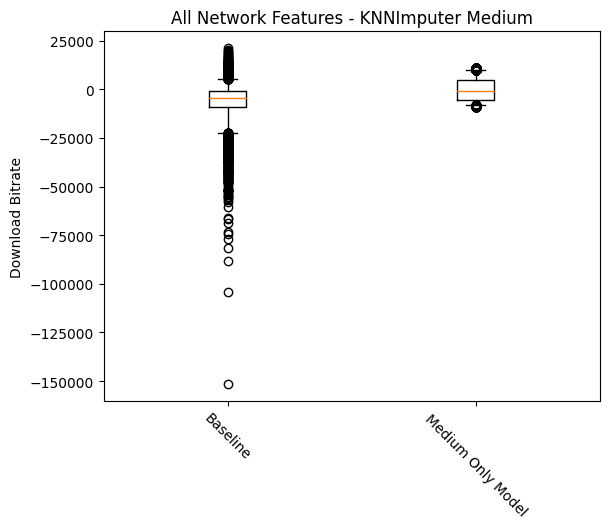

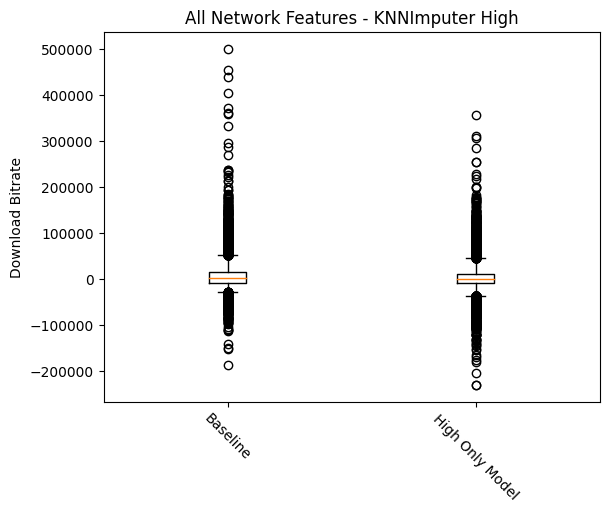

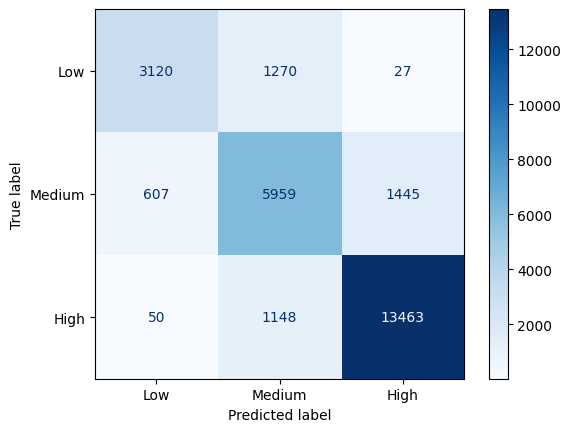

In [14]:
carry_out_analysis("knn_all_network", "All Network Features - KNNImputer")

### This Trained Horribly

C:\Users\Killian\AppData\Local\Temp\ipykernel_4004\1781421743.py:2: RuntimeWarning: invalid value encountered in log
  residuals = np.log(np.sum(true-pred, axis=1))


Standardised All Network Features - KNNImputer
+----------+----------+--------------+
|  Model   | Variance | Standard Dev |
+----------+----------+--------------+
| baseline |   nan    |     nan      |
| multiOne |   nan    |     nan      |
| multiAll |   nan    |     nan      |
+----------+----------+--------------+





C:\Users\Killian\AppData\Local\Temp\ipykernel_4004\1781421743.py:2: RuntimeWarning: invalid value encountered in log
  residuals = np.log(np.sum(true-pred, axis=1))


Standardised All Network Features - KNNImputer Low
+----------+----------+--------------+
|  Model   | Variance | Standard Dev |
+----------+----------+--------------+
| baseline |   nan    |     nan      |
| multiOne |   nan    |     nan      |
| multiAll |   nan    |     nan      |
+----------+----------+--------------+





C:\Users\Killian\AppData\Local\Temp\ipykernel_4004\1781421743.py:2: RuntimeWarning: invalid value encountered in log
  residuals = np.log(np.sum(true-pred, axis=1))


Standardised All Network Features - KNNImputer Medium
+----------+----------+--------------+
|  Model   | Variance | Standard Dev |
+----------+----------+--------------+
| baseline |   nan    |     nan      |
| multiOne |   nan    |     nan      |
| multiAll |   nan    |     nan      |
+----------+----------+--------------+





C:\Users\Killian\AppData\Local\Temp\ipykernel_4004\1781421743.py:2: RuntimeWarning: invalid value encountered in log
  residuals = np.log(np.sum(true-pred, axis=1))


Standardised All Network Features - KNNImputer High
+----------+----------+--------------+
|  Model   | Variance | Standard Dev |
+----------+----------+--------------+
| baseline |   nan    |     nan      |
| multiOne |   nan    |     nan      |
| multiAll |   nan    |     nan      |
+----------+----------+--------------+





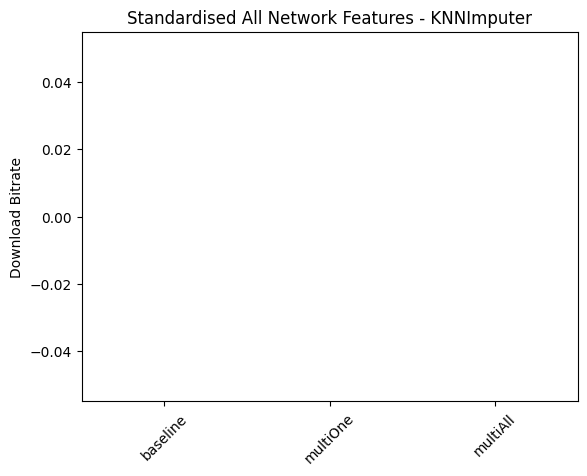

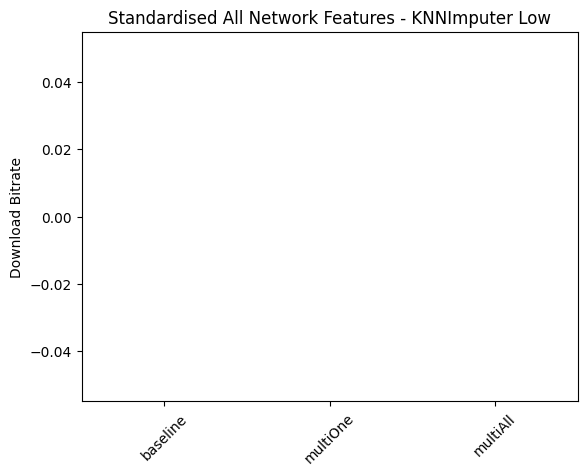

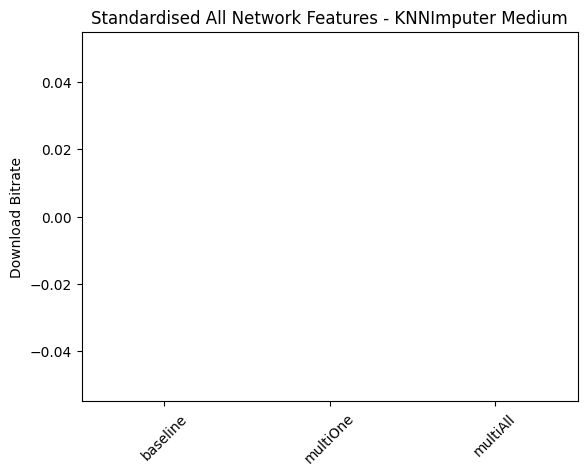

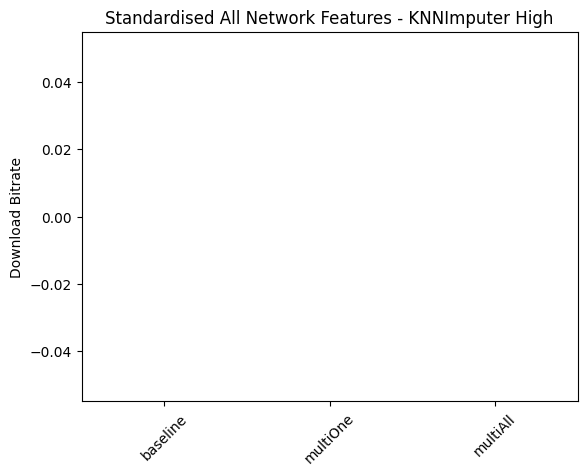

In [13]:
carry_out_analysis("standard_all_network", "Standardised All Network Features - KNNImputer")

### This trained poorly

C:\Users\Killian\AppData\Local\Temp\ipykernel_4004\1781421743.py:2: RuntimeWarning: invalid value encountered in log
  residuals = np.log(np.sum(true-pred, axis=1))


Standardised All Network Features
+----------+----------+--------------+
|  Model   | Variance | Standard Dev |
+----------+----------+--------------+
| baseline |   nan    |     nan      |
| multiOne |   nan    |     nan      |
| multiAll |   nan    |     nan      |
+----------+----------+--------------+





C:\Users\Killian\AppData\Local\Temp\ipykernel_4004\1781421743.py:2: RuntimeWarning: invalid value encountered in log
  residuals = np.log(np.sum(true-pred, axis=1))


Standardised All Network Features Low
+----------+----------+--------------+
|  Model   | Variance | Standard Dev |
+----------+----------+--------------+
| baseline |   nan    |     nan      |
| multiOne |   nan    |     nan      |
| multiAll |   nan    |     nan      |
+----------+----------+--------------+





C:\Users\Killian\AppData\Local\Temp\ipykernel_4004\1781421743.py:2: RuntimeWarning: invalid value encountered in log
  residuals = np.log(np.sum(true-pred, axis=1))


Standardised All Network Features Medium
+----------+----------+--------------+
|  Model   | Variance | Standard Dev |
+----------+----------+--------------+
| baseline |   nan    |     nan      |
| multiOne |   nan    |     nan      |
| multiAll |   nan    |     nan      |
+----------+----------+--------------+





C:\Users\Killian\AppData\Local\Temp\ipykernel_4004\1781421743.py:2: RuntimeWarning: invalid value encountered in log
  residuals = np.log(np.sum(true-pred, axis=1))


Standardised All Network Features High
+----------+----------+--------------+
|  Model   | Variance | Standard Dev |
+----------+----------+--------------+
| baseline |   nan    |     nan      |
| multiOne |   nan    |     nan      |
| multiAll |   nan    |     nan      |
+----------+----------+--------------+





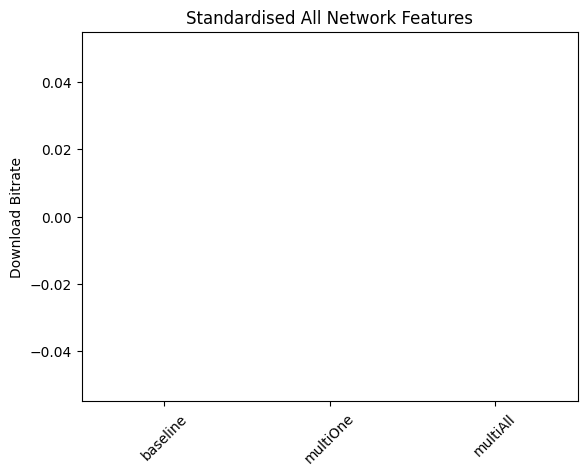

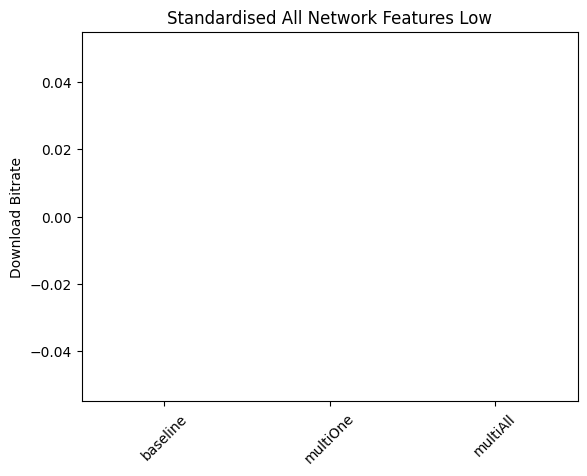

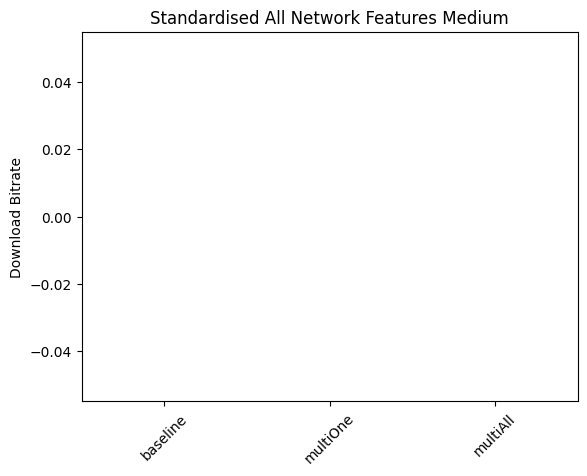

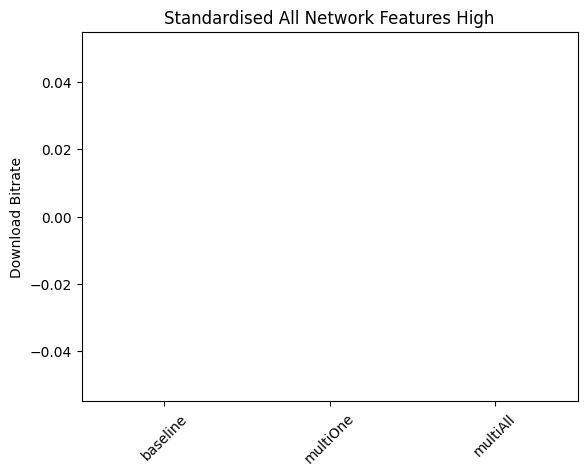

In [14]:
carry_out_analysis("st_new_all_network", "Standardised All Network Features")

### This trained poorly

C:\Users\Killian\AppData\Local\Temp\ipykernel_4004\1781421743.py:2: RuntimeWarning: invalid value encountered in log
  residuals = np.log(np.sum(true-pred, axis=1))


Standardised 2 All Network Features
+----------+----------+--------------+
|  Model   | Variance | Standard Dev |
+----------+----------+--------------+
| baseline |   nan    |     nan      |
| multiOne |   nan    |     nan      |
| multiAll |   nan    |     nan      |
+----------+----------+--------------+





C:\Users\Killian\AppData\Local\Temp\ipykernel_4004\1781421743.py:2: RuntimeWarning: invalid value encountered in log
  residuals = np.log(np.sum(true-pred, axis=1))


Standardised 2 All Network Features Low
+----------+----------+--------------+
|  Model   | Variance | Standard Dev |
+----------+----------+--------------+
| baseline |   nan    |     nan      |
| multiOne |   nan    |     nan      |
| multiAll |   nan    |     nan      |
+----------+----------+--------------+





C:\Users\Killian\AppData\Local\Temp\ipykernel_4004\1781421743.py:2: RuntimeWarning: invalid value encountered in log
  residuals = np.log(np.sum(true-pred, axis=1))


Standardised 2 All Network Features Medium
+----------+----------+--------------+
|  Model   | Variance | Standard Dev |
+----------+----------+--------------+
| baseline |   nan    |     nan      |
| multiOne |   nan    |     nan      |
| multiAll |   nan    |     nan      |
+----------+----------+--------------+





C:\Users\Killian\AppData\Local\Temp\ipykernel_4004\1781421743.py:2: RuntimeWarning: invalid value encountered in log
  residuals = np.log(np.sum(true-pred, axis=1))


Standardised 2 All Network Features High
+----------+----------+--------------+
|  Model   | Variance | Standard Dev |
+----------+----------+--------------+
| baseline |   nan    |     nan      |
| multiOne |   nan    |     nan      |
| multiAll |   nan    |     nan      |
+----------+----------+--------------+





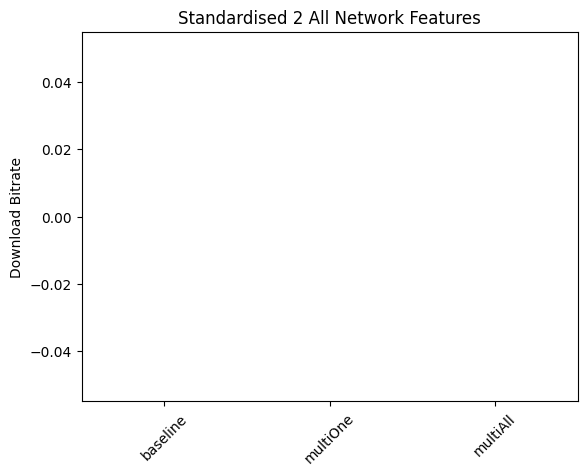

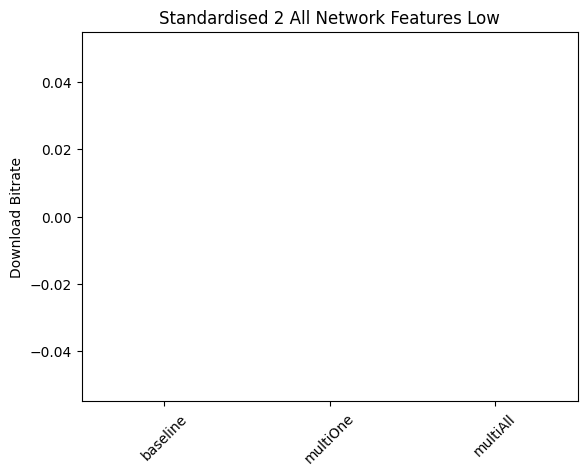

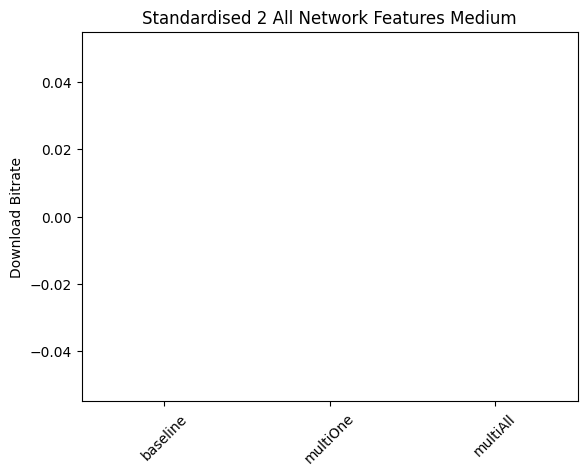

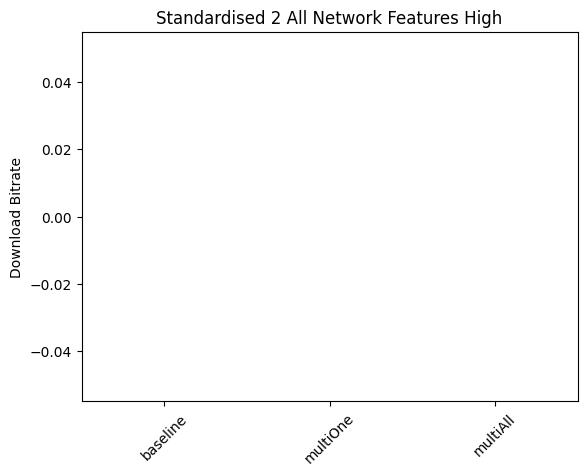

In [15]:
carry_out_analysis("standard_2_all_network", "Standardised 2 All Network Features")